<a href="https://colab.research.google.com/github/vlad-bondarenkooo/Python-Projects/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Завантаження датасетів**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Mate_homework

# Uploading dataset
countries = pd.read_csv("countries.csv")
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework


#**Підготовка Countries**

In [ ]:
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
countries.shape

(249, 5)

На початку датасет **Countries** має 5 стовпчиків та 249 рядків.

In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


З типами даних усе добре , відхилень не спостерігається, але на жаль є Null значення.

In [ ]:
countries.describe(include = "all")

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


Найпопулярнішим регіном є Africa, а суб-регіоном Sub-Saharan Africa.

In [ ]:
countries.isna().sum()

,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


In [ ]:
countries.isna().sum() / countries.shape[0] * 100

,0
name,0.000000
alpha-2,0.401606
alpha-3,0.000000
region,0.401606
sub-region,0.401606


In [ ]:
countries = countries.dropna()

Була виявлена незначна кількість Null значень (менше 1 %) тому я просто вирішив їх видалити.

In [ ]:
countries.describe(include = "all")

,name,alpha-2,alpha-3,region,sub-region
count,247,247,247,247,247
unique,247,247,247,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,59,52


In [ ]:
countries.duplicated().sum()

0

Дублікатів не спостерігається.

#**Підготовка Events**

In [ ]:
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
events.shape

(1330, 10)

На початку в датасеті Events є 10 стовпчиків та 1330 рядків.

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


Деяким рядкам не підходять типи даних, тому я зроблю заміну.

In [ ]:
events["Order Date"] = pd.to_datetime(events["Order Date"], errors="coerce")

In [ ]:
events["Ship Date"] = pd.to_datetime(events["Ship Date"], errors="coerce")

In [ ]:
events["Order ID"] = events["Order ID"].astype(str)

In [ ]:
events["Product ID"] = events["Product ID"].astype(str)

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   object        
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   object        
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 104.0+ KB


Я змінив тип даних Order Date та Ship Date на datetime так як це дати. І також змінив числовий тип даних Order ID та Product ID на str, так як нам скоріше за все знадобиться групувати дані за цими показниками.

In [ ]:
events.describe(include = "all")

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
count,1330,1330,1330,1330,1248,1330,1330,1328.000000,1330.000000,1330.000000
unique,1330,NaN,NaN,6,45,12,3,NaN,NaN,NaN
top,100640618,NaN,NaN,M,AND,8681,Offline,NaN,NaN,NaN
freq,1,NaN,NaN,353,40,123,667,NaN,NaN,NaN
mean,NaN,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,NaN,NaN,NaN,NaN,4952.201807,264.893541,187.246812
min,NaN,2010-01-01 00:00:00,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,2.000000,9.330000,6.920000
25%,NaN,2011-12-16 06:00:00,2012-01-03 00:00:00,NaN,NaN,NaN,NaN,2356.750000,81.730000,35.840000
50%,NaN,2013-10-17 00:00:00,2013-11-09 00:00:00,NaN,NaN,NaN,NaN,4962.000000,154.060000,97.440000
75%,NaN,2015-08-28 18:00:00,2015-10-03 18:00:00,NaN,NaN,NaN,NaN,7459.500000,437.200000,263.330000
max,NaN,2017-07-23 00:00:00,2017-08-31 00:00:00,NaN,NaN,NaN,NaN,9999.000000,668.270000,524.960000


In [ ]:
events.isna().sum() / events.shape[0] * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


У нас є доволі великий відсоток Null значень у стовпчику Country Code, тому я вирішив змінити їх на Unknown. А Null значення в Units Sold вирішив видалити так як їх кількість доволі мала.

In [ ]:
events["Country Code"] = events["Country Code"].fillna("Unknown")

In [ ]:
events.isna().sum() / events.shape[0] * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,0.000000
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


In [ ]:
events = events.dropna()

In [ ]:
events.describe(include = "all")

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
count,1328,1328,1328,1328,1328,1328,1328,1328.000000,1328.000000,1328.000000
unique,1328,NaN,NaN,6,46,12,3,NaN,NaN,NaN
top,100640618,NaN,NaN,M,Unknown,8681,Offline,NaN,NaN,NaN
freq,1,NaN,NaN,352,82,123,665,NaN,NaN,NaN
mean,NaN,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,NaN,NaN,NaN,NaN,4952.201807,264.913245,187.211521
min,NaN,2010-01-01 00:00:00,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,2.000000,9.330000,6.920000
25%,NaN,2011-12-14 06:00:00,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,2356.750000,81.730000,35.840000
50%,NaN,2013-10-15 12:00:00,2013-11-05 12:00:00,NaN,NaN,NaN,NaN,4962.000000,154.060000,97.440000
75%,NaN,2015-08-29 12:00:00,2015-10-04 18:00:00,NaN,NaN,NaN,NaN,7459.500000,437.200000,263.330000
max,NaN,2017-07-23 00:00:00,2017-08-31 00:00:00,NaN,NaN,NaN,NaN,9999.000000,668.270000,524.960000


In [ ]:
events.duplicated().sum()

0

Дублікатів не спостерігається

#**Підготовка Products**

In [ ]:
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
products.shape

(12, 2)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [ ]:
products["id"] = products["id"].astype(str)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     object
 1   item_type  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [ ]:
products.describe(include = "all")

,id,item_type
count,12,12
unique,12,12
top,2103,Cereal
freq,1,1


In [ ]:
products.duplicated().sum()

0

У датасеті Products я лише змінив тип даних у стовпчику id на str для можливості групувати даних під ці категорії. Null значення та дублікати не спостерігаються.

#**З’єднання трьох таблиць в один датафрейм**

In [ ]:
merged_events_countries = pd.merge(events, countries, left_on="Country Code",right_on = "alpha-3", how="inner")

In [ ]:
final_df = pd.merge(merged_events_countries, products, left_on="Product ID", right_on="id", how="inner")

In [ ]:
final_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,alpha-2,alpha-3,region,sub-region,id,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,NOR,Europe,Northern Europe,2103,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,SRB,Europe,Southern Europe,2103,Cereal
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,MNE,Europe,Southern Europe,2455,Clothes
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,SRB,Europe,Southern Europe,1270,Beverages
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,SK,SVK,Europe,Eastern Europe,8681,Office Supplies


In [ ]:
# Видаляємо одразу кілька стовпчиків
final_df.drop(columns=['Country Code', 'Product ID', 'alpha-2', 'alpha-3', 'id'], inplace=True)

In [ ]:
final_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,name,region,sub-region,item_type
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies


In [ ]:
final_df.rename(columns={
    'name': 'Country',
    'item_type': 'Product'
}, inplace=True)

In [ ]:
final_df.columns = final_df.columns.str.lower()

In [ ]:
final_df.columns = final_df.columns.str.replace(" ", "_")
final_df.columns = final_df.columns.str.replace("-", "_")

In [ ]:
final_df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub_region,product
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1246 non-null   object        
 1   order_date      1246 non-null   datetime64[ns]
 2   ship_date       1246 non-null   datetime64[ns]
 3   order_priority  1246 non-null   object        
 4   sales_channel   1246 non-null   object        
 5   units_sold      1246 non-null   float64       
 6   unit_price      1246 non-null   float64       
 7   unit_cost       1246 non-null   float64       
 8   country         1246 non-null   object        
 9   region          1246 non-null   object        
 10  sub_region      1246 non-null   object        
 11  product         1246 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 116.9+ KB


In [ ]:
final_df.describe(include = "all")

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub_region,product
count,1246,1246,1246,1246,1246,1246.000000,1246.000000,1246.000000,1246,1246,1246,1246
unique,1246,NaN,NaN,6,3,NaN,NaN,NaN,45,2,5,12
top,100640618,NaN,NaN,M,Online,NaN,NaN,NaN,Andorra,Europe,Southern Europe,Beverages
freq,1,NaN,NaN,329,622,NaN,NaN,NaN,40,1164,411,113
mean,NaN,2013-10-11 14:45:15.890850816,2013-11-05 11:46:07.897271296,NaN,NaN,4953.186998,264.203387,186.310088,NaN,NaN,NaN,NaN
min,NaN,2010-01-01 00:00:00,2010-01-10 00:00:00,NaN,NaN,2.000000,9.330000,6.920000,NaN,NaN,NaN,NaN
25%,NaN,2011-12-09 18:00:00,2011-12-31 12:00:00,NaN,NaN,2349.250000,81.730000,35.840000,NaN,NaN,NaN,NaN
50%,NaN,2013-10-14 00:00:00,2013-11-03 00:00:00,NaN,NaN,4980.000000,154.060000,97.440000,NaN,NaN,NaN,NaN
75%,NaN,2015-09-01 12:00:00,2015-10-07 18:00:00,NaN,NaN,7477.000000,433.372500,263.330000,NaN,NaN,NaN,NaN
max,NaN,2017-07-22 00:00:00,2017-08-31 00:00:00,NaN,NaN,9999.000000,668.270000,524.960000,NaN,NaN,NaN,NaN


In [ ]:
final_df.duplicated().sum()

0

#**Ключові метрики**

In [ ]:
final_df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub_region,product
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies


Для обрахунку таких основних метрик як загальний дохід та загальний прибуток я додам відповідні стовпчики до датафрейму.

In [ ]:
final_df["total_revenue"] = final_df["unit_price"] * final_df["units_sold"]

In [ ]:
final_df["total_cost"] = final_df["unit_cost"] * final_df["units_sold"]
final_df["total_profit"] = final_df["total_revenue"] - final_df["total_cost"]

In [ ]:
final_df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub_region,product,total_revenue,total_cost,total_profit
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,1445686.20,1165411.20,280275.00


In [ ]:
total_orders = final_df.shape[0]
total_revenue = final_df["total_revenue"].sum()
total_profit = final_df["total_profit"].sum()
final_df["sales_channel"] = final_df["sales_channel"].str.capitalize()
online_orders = final_df[final_df["sales_channel"] == "Online"].shape[0]
offline_orders = final_df[final_df["sales_channel"] == "Offline"].shape[0]
count_of_countries = final_df["country"].nunique()
count_of_products = final_df["product"].nunique()

In [ ]:
print(f"Загальна кількість замовлень: {total_orders}\nЗагальний дохід: {total_revenue} $\nЗагальний прибуток: {total_profit} $\nОнлайн замовлення: {online_orders}\nОфлайн замовлення: {offline_orders}\nКількість країн: {count_of_countries}\nКількість товарів: {count_of_products}")

Загальна кількість замовлень: 1246
Загальний дохід: 1598983761.26 $
Загальний прибуток: 473709035.06 $
Онлайн замовлення: 625
Офлайн замовлення: 621
Кількість країн: 45
Кількість товарів: 12


#**Аналіз продажів**

##**Аналіз продажів в розрізі категорій товарів**

In [ ]:
total_revenue_product = final_df.groupby("product", as_index=False)["total_revenue"].sum()

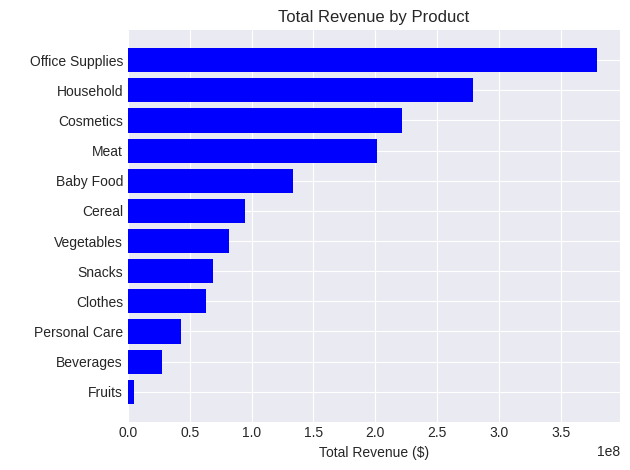

In [ ]:
# Сортуємо дані у спадному порядку за total_revenue
sorted_data = total_revenue_product.sort_values(by="total_revenue", ascending=True)

# Створення горизонтального барчарту
plt.style.use("seaborn-v0_8-darkgrid")
plt.barh(sorted_data["product"], sorted_data["total_revenue"], color="blue")

# Додавання заголовків і підписів
plt.title("Total Revenue by Product")  # Заголовок
plt.xlabel("Total Revenue ($)")       # Підпис осі X
plt.ylabel(" ")                       # Підпис осі Y

# Відображення графіка
plt.tight_layout()  # Забезпечує правильне відображення графіка
plt.show()

In [ ]:
total_cost_product = final_df.groupby("product", as_index=False)["total_cost"].sum()

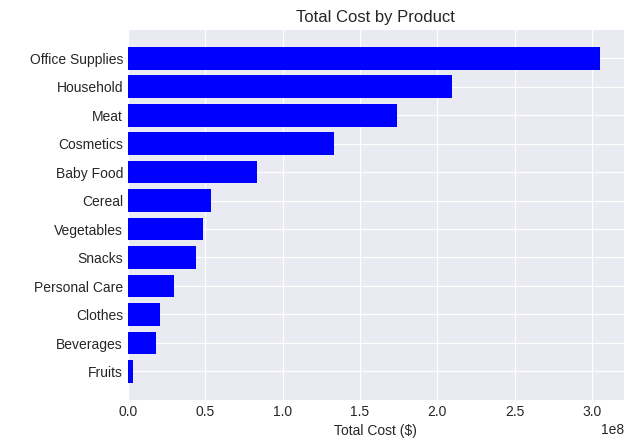

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")
sorted_data = total_cost_product.sort_values(by="total_cost", ascending=True)
plt.barh(sorted_data["product"], sorted_data["total_cost"], color="blue")
plt.title("Total Cost by Product")  # Title of the graph
plt.xlabel("Total Cost ($)")  # X-axis label
plt.ylabel(" ")  # Y-axis label
plt.show()

In [ ]:
total_profit_product = final_df.groupby("product", as_index=False)["total_profit"].sum()

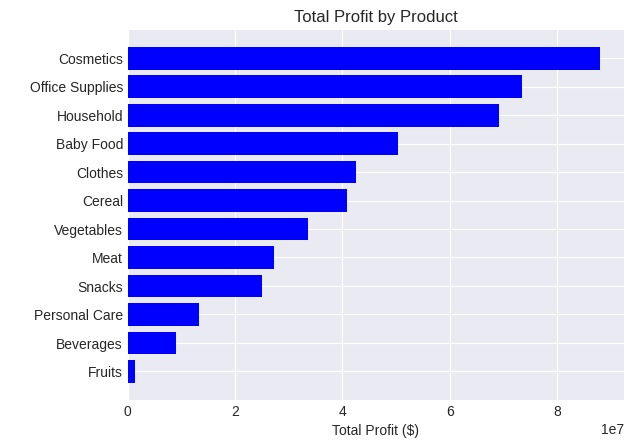

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")
sorted_data = total_profit_product.sort_values(by="total_profit", ascending=True)
plt.barh(sorted_data["product"], sorted_data["total_profit"], color="blue")
plt.title("Total Profit by Product")  # Title of the graph
plt.xlabel("Total Profit ($)")  # X-axis label
plt.ylabel(" ")  # Y-axis label
plt.show()

In [ ]:
total_units_sold_product = final_df.groupby("product", as_index=False)["units_sold"].sum()

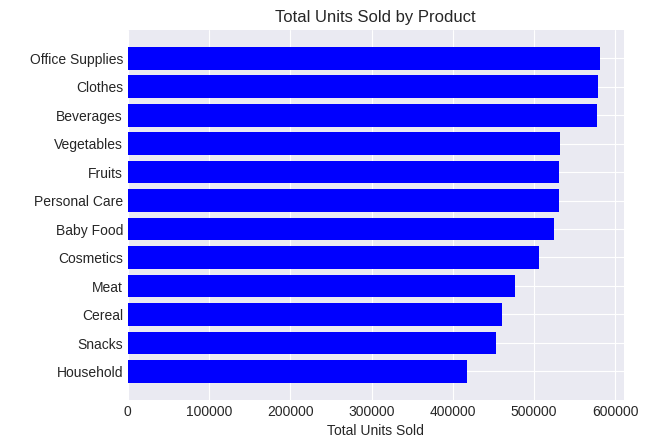

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")
sorted_data = total_units_sold_product.sort_values(by="units_sold", ascending=True)
plt.barh(sorted_data["product"], sorted_data["units_sold"], color="blue")
plt.title("Total Units Sold by Product")  # Title of the graph
plt.xlabel("Total Units Sold")  # X-axis label
plt.ylabel(" ")  # Y-axis label
plt.show()

##**Аналіз продажів в розрізі країн**

In [ ]:
total_revenue_country = final_df.groupby("country", as_index=False)["total_revenue"].sum()

In [ ]:
import plotly.graph_objects as go

# Побудова хороплет-карти
fig = go.Figure(go.Choropleth(
    locations=total_revenue_country["country"],
    locationmode="country names",
    z=total_revenue_country["total_revenue"],
    colorscale="RdYlGn",
    colorbar_title="Total Revenue",
))

fig.update_layout(title="Total Revenue by Country")
fig.show()


In [ ]:
total_cost_country = final_df.groupby("country", as_index=False)["total_cost"].sum()

In [ ]:
# Побудова хороплет-карти
fig = go.Figure(go.Choropleth(
    locations=total_revenue_country["country"],
    locationmode="country names",
    z=total_cost_country["total_cost"],
    colorscale="RdYlGn",
    colorbar_title="Total Cost",
))

fig.update_layout(title="Total Cost by Country")
fig.show()


In [ ]:
total_profit_country = final_df.groupby("country", as_index=False)["total_profit"].sum()

In [ ]:
# Побудова хороплет-карти
fig = go.Figure(go.Choropleth(
    locations=total_revenue_country["country"],
    locationmode="country names",
    z=total_profit_country["total_profit"],
    colorscale="RdYlGn",
    colorbar_title="Total Profit",
))

fig.update_layout(title="Total Profit by Country")
fig.show()


In [ ]:
total_units_sold_country = final_df.groupby("country", as_index=False)["units_sold"].sum()

In [ ]:
# Побудова хороплет-карти
fig = go.Figure(go.Choropleth(
    locations=total_revenue_country["country"],
    locationmode="country names",
    z=total_units_sold_country["units_sold"],
    colorscale="RdYlGn",
    colorbar_title="Total Units Sold",
))

fig.update_layout(title="Total Units Sold by Country")
fig.show()


##**Аналіз продажів у розрізі регіонів**

In [ ]:
total_revenue_region = final_df.groupby("region", as_index=False)["total_revenue"].sum()

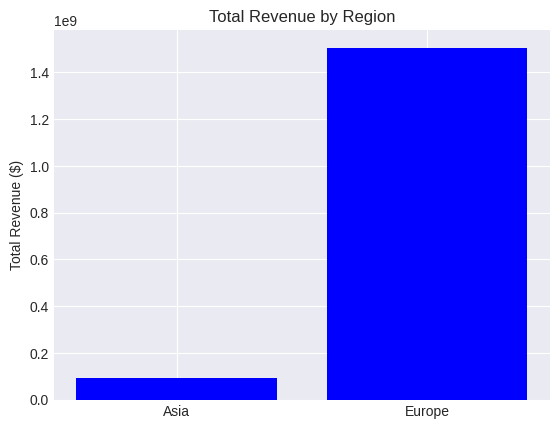

In [ ]:
plt.bar(total_revenue_region["region"], total_revenue_region["total_revenue"], color="blue")
plt.title("Total Revenue by Region")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Total Revenue ($)")  # Y-axis label
plt.show()

In [ ]:
total_cost_region = final_df.groupby("region", as_index=False)["total_cost"].sum()

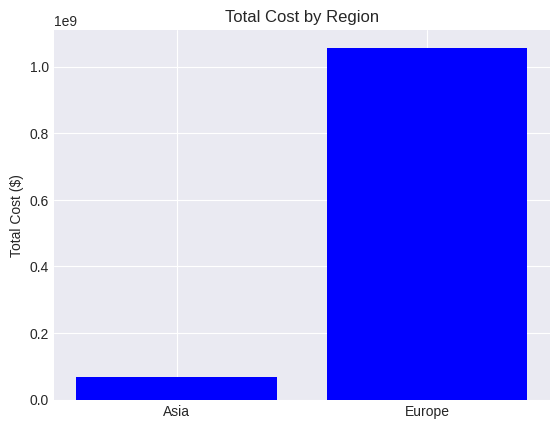

In [ ]:
plt.bar(total_cost_region["region"], total_cost_region["total_cost"], color="blue")
plt.title("Total Cost by Region")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Total Cost ($)")  # Y-axis label
plt.show()

In [ ]:
total_profit_region = final_df.groupby("region", as_index=False)["total_profit"].sum()

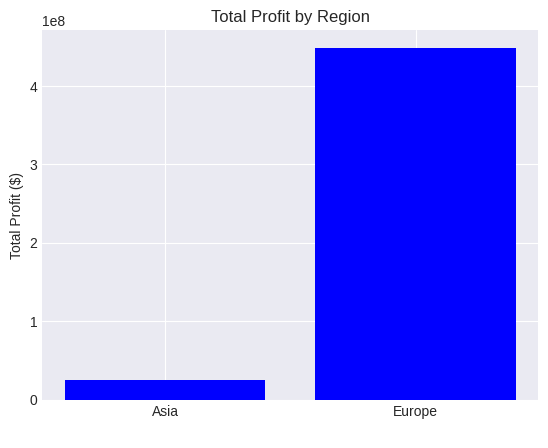

In [ ]:
plt.bar(total_profit_region["region"], total_profit_region["total_profit"], color="blue")
plt.title("Total Profit by Region")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Total Profit ($)")  # Y-axis label
plt.show()

In [ ]:
total_units_sold_region = final_df.groupby("region", as_index=False)["units_sold"].sum()

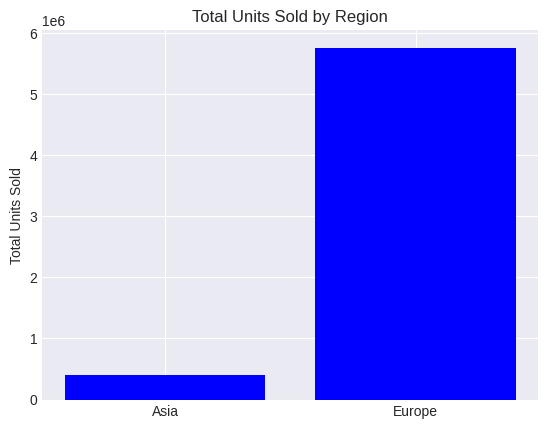

In [ ]:
plt.bar(total_units_sold_region["region"], total_units_sold_region["units_sold"], color="blue")
plt.title("Total Units Sold by Region")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Total Units Sold")  # Y-axis label
plt.show()

##**Аналіз продажів в розрізі каналів продажу**

In [ ]:
total_analysis_channel = final_df.groupby("sales_channel", as_index=False)[["total_revenue", "total_profit", "total_cost", "units_sold"]].sum()

In [ ]:
total_analysis_channel

,sales_channel,total_revenue,total_profit,total_cost,units_sold
0,Offline,8.100305e+08,2.385113e+08,5.715191e+08,3113412.0
1,Online,7.889533e+08,2.351977e+08,5.537556e+08,3058259.0


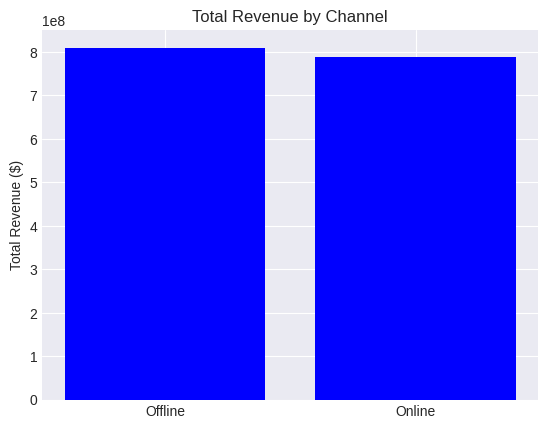

In [ ]:
plt.bar(total_analysis_channel["sales_channel"], total_analysis_channel["total_revenue"], color="blue")
plt.title("Total Revenue by Channel")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Total Revenue ($)")  # Y-axis label
plt.show()

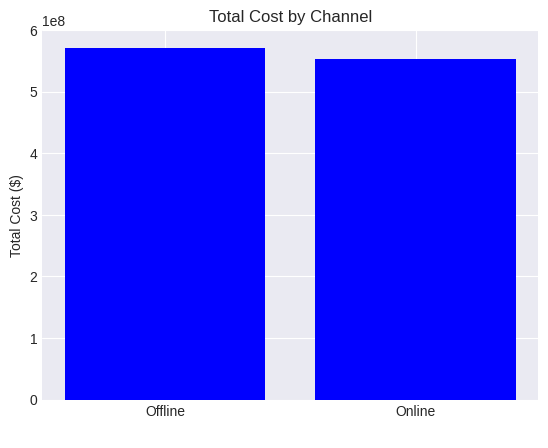

In [ ]:
plt.bar(total_analysis_channel["sales_channel"], total_analysis_channel["total_cost"], color="blue")
plt.title("Total Cost by Channel")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Total Cost ($)")  # Y-axis label
plt.show()

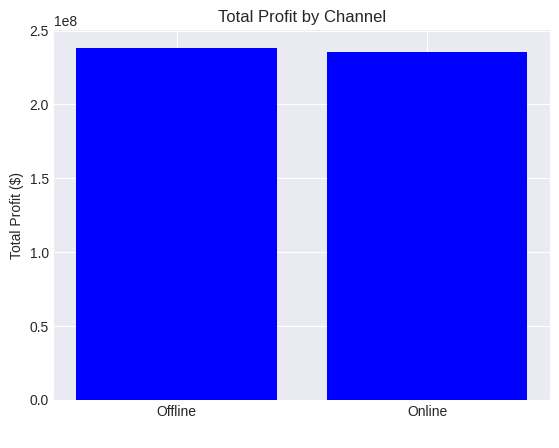

In [ ]:
plt.bar(total_analysis_channel["sales_channel"], total_analysis_channel["total_profit"], color="blue")
plt.title("Total Profit by Channel")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Total Profit ($)")  # Y-axis label
plt.show()

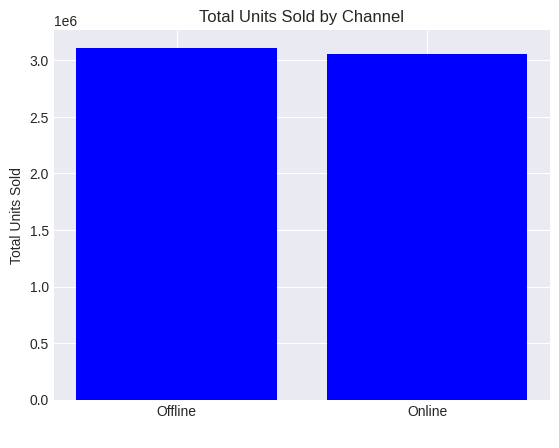

In [ ]:
plt.bar(total_analysis_channel["sales_channel"], total_analysis_channel["units_sold"], color="blue")
plt.title("Total Units Sold by Channel")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Total Units Sold")  # Y-axis label
plt.show()

#**Аналіз інтервалів часу між замовленням та його відвантаженням**

In [ ]:
final_df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub_region,product,total_revenue,total_cost,total_profit
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,1445686.20,1165411.20,280275.00


In [ ]:
final_df["shipping_time"] = (final_df["ship_date"] - final_df["order_date"]).dt.days

In [ ]:
final_df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub_region,product,total_revenue,total_cost,total_profit,shipping_time
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50,10
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87,0
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24,31
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68,38
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,1445686.20,1165411.20,280275.00,34


##**У розрізі категорій товарів**

In [ ]:
average_of_shipping_time_product  = final_df.groupby("product", as_index=False)["shipping_time"].mean()

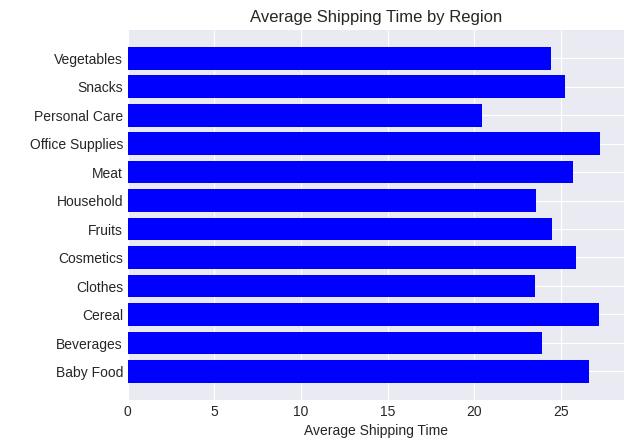

In [ ]:
plt.barh(average_of_shipping_time_product["product"], average_of_shipping_time_product["shipping_time"], color="blue")
plt.title("Average Shipping Time by Region")  # Title of the graph
plt.xlabel("Average Shipping Time")  # X-axis label
plt.ylabel(" ")  # Y-axis label
plt.show()

##**У розрізі країн**

In [ ]:
average_of_shipping_time_country  = final_df.groupby("country", as_index=False)["shipping_time"].mean()

In [ ]:
import plotly.graph_objects as go

# Побудова хороплет-карти
fig = go.Figure(go.Choropleth(
    locations=average_of_shipping_time_country["country"],
    locationmode="country names",
    z=average_of_shipping_time_country["shipping_time"],
    colorscale="RdYlGn",
    colorbar_title="Average Shipping Time",
))

fig.update_layout(title="Average Shipping Time by Country")
fig.show()


##**У розрізі регіонів**

In [ ]:
average_of_shipping_time_region  = final_df.groupby("region", as_index=False)["shipping_time"].mean()

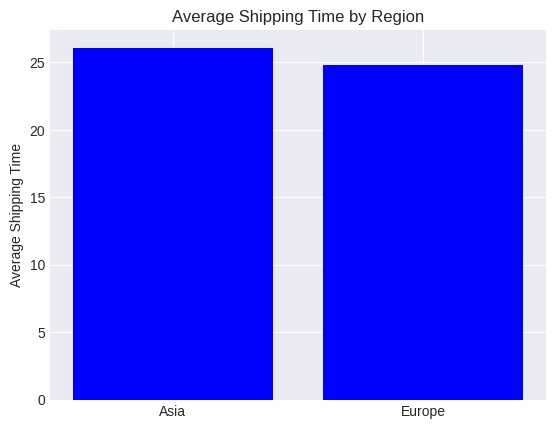

In [ ]:
plt.bar(average_of_shipping_time_region["region"], average_of_shipping_time_region["shipping_time"], color="blue")
plt.title("Average Shipping Time by Region")  # Title of the graph
plt.xlabel(" ")  # X-axis label
plt.ylabel("Average Shipping Time")  # Y-axis label
plt.show()

#**Аналіз динаміки продажів**

In [ ]:
final_df["year"] = final_df["order_date"].dt.year

In [ ]:
final_df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub_region,product,total_revenue,total_cost,total_profit,shipping_time,year
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50,10,2014
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87,0,2016
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24,31,2017
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68,38,2012
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,1445686.20,1165411.20,280275.00,34,2015


##**У розрізі категорій товарів**

<Figure size 1000x600 with 0 Axes>

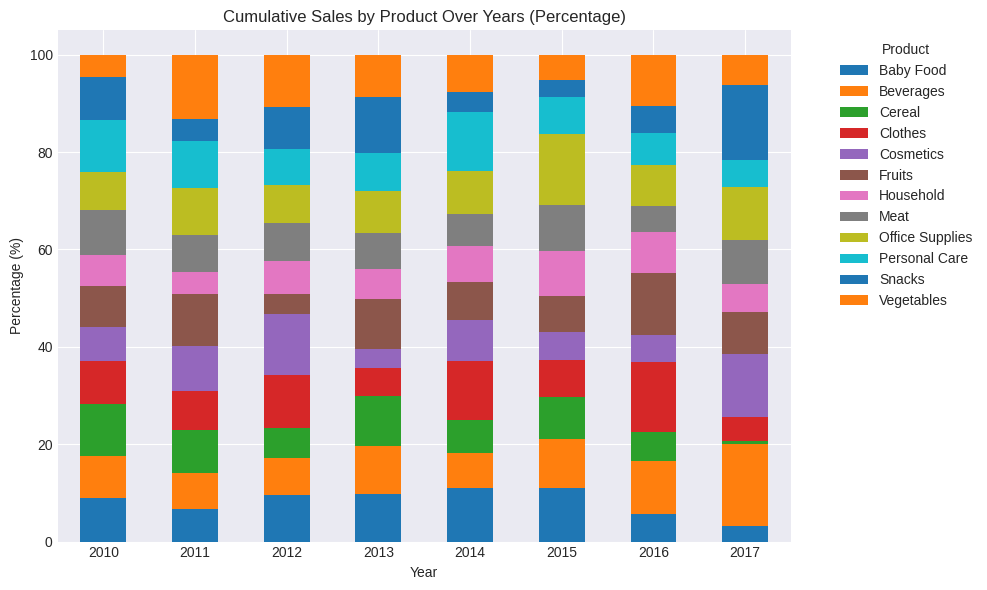

In [ ]:
dynamic_analysis_product = final_df.groupby(["product", "year"], observed=True)["units_sold"].sum().reset_index()

# Перетворюємо дані у формат для побудови накопичувальної діаграми
pivot_data = dynamic_analysis_product.pivot(index="year", columns="product", values="units_sold").fillna(0)

# Нормалізуємо дані для кожного року, щоб отримати відсотки
pivot_data_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Створення накопичувальної стовпчастої діаграми
plt.figure(figsize=(10, 6))
ax = pivot_data_percent.plot(kind="bar", stacked=True, figsize=(10, 6))

# Додавання заголовків та підписів
plt.title("Cumulative Sales by Product Over Years (Percentage)")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

# Переміщення легенди за межі графіка
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')

# Показ графіка
plt.tight_layout()  # Забезпечує правильне відображення графіка без перекриття
plt.show()


##**У розрізі країн**

Так як країн занадто багато я покажу динаміку показавши зведену таблицю, так як на будь-якій візуалізації було б дуже важко щось розібрати.

In [ ]:
pd.pivot_table(final_df, index = "country", columns = "year", values = "units_sold", aggfunc = "sum")

year,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,
Albania,17850.0,14852.0,17589.0,3536.0,4314.0,11171.0,19547.0,1749.0
Andorra,44747.0,10717.0,27065.0,22665.0,11620.0,8459.0,51888.0,8525.0
Armenia,30778.0,26540.0,10897.0,5347.0,16676.0,25459.0,22018.0,12950.0
Austria,31525.0,24624.0,14455.0,11638.0,12964.0,32583.0,14666.0,3118.0
Belarus,20885.0,15078.0,31419.0,7355.0,18668.0,19367.0,25819.0,14841.0
Belgium,8524.0,17412.0,9124.0,22174.0,10586.0,30501.0,19836.0,2349.0
Bosnia and Herzegovina,16272.0,6366.0,53970.0,14360.0,3857.0,42041.0,16679.0,NaN
Bulgaria,47414.0,4448.0,27995.0,15723.0,20515.0,4047.0,20863.0,9083.0
Croatia,10275.0,347.0,14422.0,23270.0,4958.0,NaN,10203.0,10470.0


##**У розрізі регіонів**

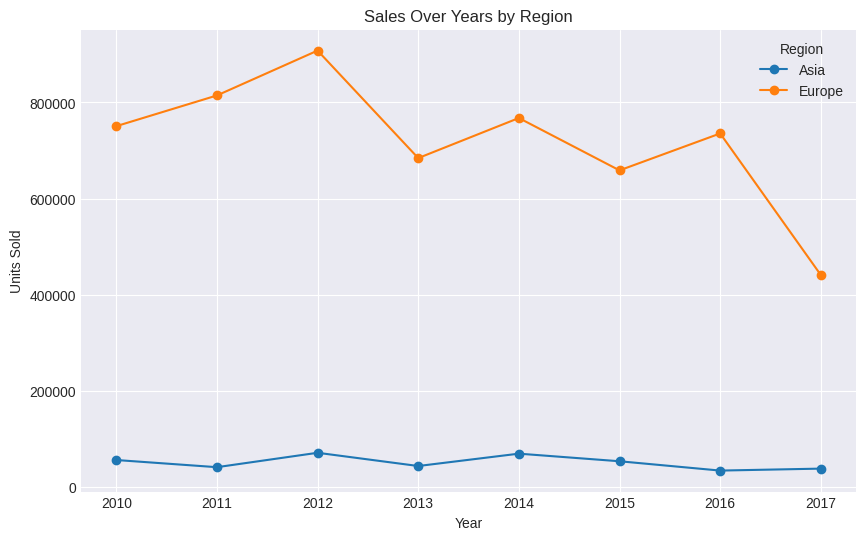

In [ ]:
dynamic_analysis_region = final_df.groupby(["region", "year"], observed=True)["units_sold"].sum().reset_index()

# Створення графіка
plt.figure(figsize=(10, 6))

# Для кожного регіону (категорії товару) будуємо лінію
for region in dynamic_analysis_region['region'].unique():
    region_data = dynamic_analysis_region[dynamic_analysis_region['region'] == region]
    plt.plot(region_data['year'], region_data['units_sold'], marker="o", label=region)

# Додавання заголовків та підписів
plt.title("Sales Over Years by Region")
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.legend(title="Region")

# Показ графіка
plt.show()


#**Аналіз продажів товарів за днями тижня**

In [ ]:
final_df["day_of_week"] = final_df["order_date"].dt.day_name()

In [ ]:
final_df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub_region,product,total_revenue,total_cost,total_profit,shipping_time,year,day_of_week
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50,10,2014,Wednesday
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87,0,2016,Thursday
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24,31,2017,Saturday
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68,38,2012,Saturday
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,1445686.20,1165411.20,280275.00,34,2015,Sunday


<Figure size 1000x600 with 0 Axes>

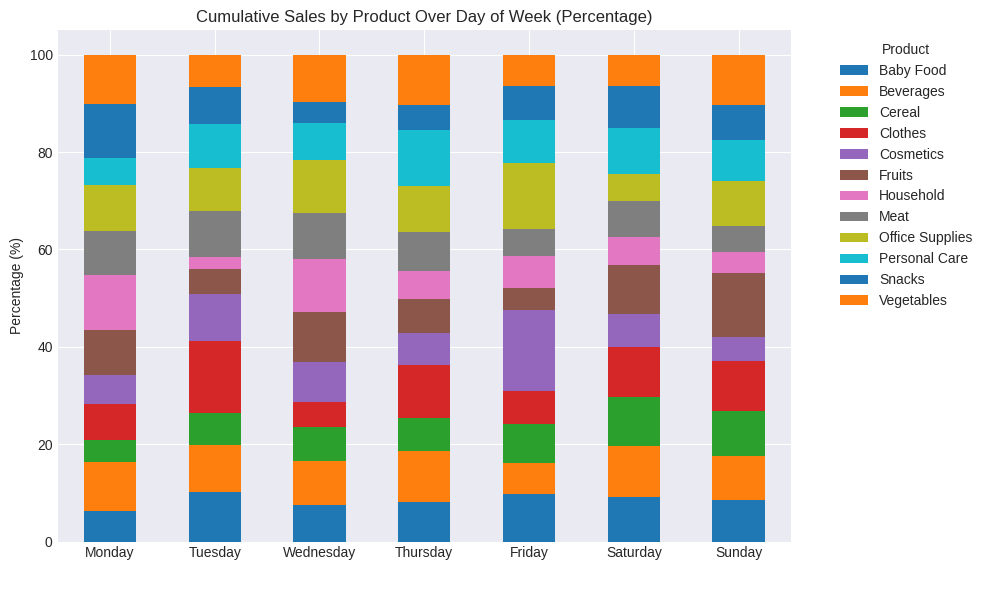

In [ ]:
day_of_week_analysis_product = final_df.groupby(["product", "day_of_week"], observed=True)["units_sold"].sum().reset_index()

# Визначаємо порядок днів тижня
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Перетворюємо дані у формат для побудови накопичувальної діаграми
pivot_data = day_of_week_analysis_product.pivot(index="day_of_week", columns="product", values="units_sold").fillna(0)

# Переставляємо рядки у правильному порядку
pivot_data = pivot_data.loc[ordered_days]

# Нормалізуємо дані для кожного року, щоб отримати відсотки
pivot_data_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Створення накопичувальної стовпчастої діаграми
plt.figure(figsize=(10, 6))
pivot_data_percent.plot(kind="bar", stacked=True, figsize=(10, 6))

# Додавання заголовків та підписів
plt.title("Cumulative Sales by Product Over Day of Week (Percentage)")
plt.xlabel(" ")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

# Переміщення легенди за межі графіка
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')

# Показ графіка
plt.tight_layout()  # Забезпечує правильне відображення графіка без перекриття
plt.show()


#**Висновки з погляду бізнес-логіки:**

1. **Популярність категорій:**
   Лідери продажів:"Office Supplies", "Clothes" та "Beverages" мають найвищі продажі за кількістю проданих товарів, що свідчить про високий попит на ці товари. Це може бути стратегічною можливістю для подальших інвестицій у ці категорії для збільшення обсягів продажів.
   Категорії з низьким доходом: хоча "Beverages" та "Personal Care" входять до топ-5 за кількістю проданих товарів, вони демонструють найменші доходи та прибутки. Це свідчить про низьку маржинальність у цих категоріях або недостатньо оптимізовані ціни.

2. **Дохід:**
   Категорії з найвищим доходом: "Office Supplies", "Household" та "Cosmetics" приносять найбільше доходу. Це вказує на необхідність підтримання та розвитку цих категорій через акції, маркетинг або розширення асортименту.
   Низький дохід при високих продажах: "Beverages" має високу кількість продажів, але приносить низький дохід, що може вимагати аналізу цінової політики або зниження витрат у виробництві.

3. **Прибуток:**
   Неочікувані лідери: категорія "Cosmetics" демонструє один із найвищих прибутків, хоча її дохід середній. Це свідчить про високу маржинальність продуктів у цій категорії, що може означати потенціал для подальшого зростання.
   Потенційні інвестиції: інші прибуткові категорії, як "Office Supplies", "Household" і "Babyfood", також заслуговують на подальше фокусування для збільшення їх частки ринку та прибутку.

4. **Регіональний аналіз:**
   Європа — ключовий ринок: Найбільші продажі, дохід та прибуток належать Європі, особливо Південній Європі. Це свідчить про важливість підтримки та розширення на цьому ринку через регіональні кампанії.

5. **Онлайн та офлайн продажі:**
     Кількість продажів одно й іншого типу майже однакові, хоча є певна перевага саме в офлайн продажах, так як кількість замовлень трішки й менша, але дохід та прибуток більший.

6.  **Аналіз інтервалу часу між замовленням та його   відвантаженням:**
     Дивлячись на результати аналізу, середній інтервал в розрізі категорій, країн та регіонів - однаковий, тому прибуток не залежить від часу необхідного на відвантаження товару. Прибуток залежить лише від виду категорії товару.

7. **Аналіз динаміки продажів товару за роками:**
    На жаль кількість продажів товару мають певні коливання на протязі всього часу, тому конкретну оцінку сказати важко. Але є певна закономірність саме в сумарних продажах за роки в розрізі регіонів: динаміка в 2016-2017 має негативний характер, так як кількість продажів помітно зменшилися порівнявши їх з попередніми роками.

   

**Рекомендації:**
1. Розширювати інвестиції в категорії з високим прибутком, такі як "Cosmetics", "Office Supplies", "Household" та "Babyfood".
2. Переглянути стратегію для категорій з низьким доходом, зокрема "Beverages" та "Personal Care", можливо через підвищення цін або зменшення витрат.
3. Активно працювати над стабілізацією продажів у Європі та аналізувати причини спаду в 2016-2017 році.
